## Тестирование работы условного вариационного автоэнкодера

In [2]:
import sys
import os
current_dir = os.path.abspath('')
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, project_root)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(51)
from encoder.cvae import CVAE
from sklearn.preprocessing import OneHotEncoder

# Загрузка и преобразование данных

In [4]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

In [5]:
(x_train, y_train), (x_test, y_test) = load_data('../data/3. mnist.npz')

In [6]:
ohe=OneHotEncoder(sparse_output=False)
y_t=ohe.fit_transform(y_train.reshape(-1,1))

# Обучение модели

In [7]:
hidden_size=20
encoder_layers=[784,5,5,5]
decoder_layers=[50,150,250,784]
cvae=CVAE(encoder_layers,hidden_size,decoder_layers)

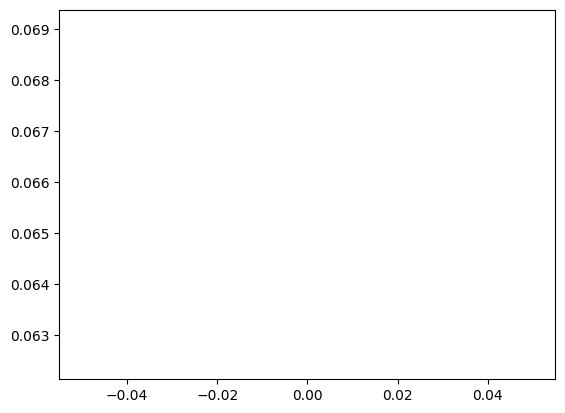

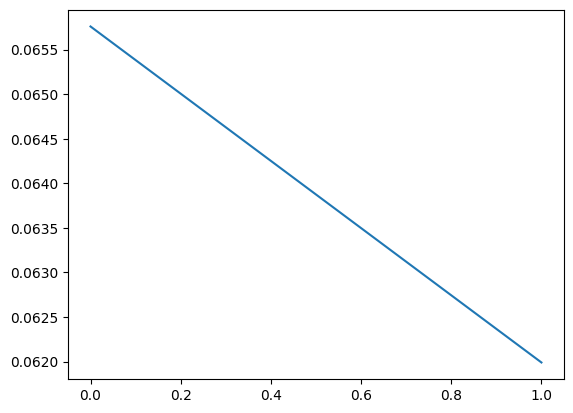

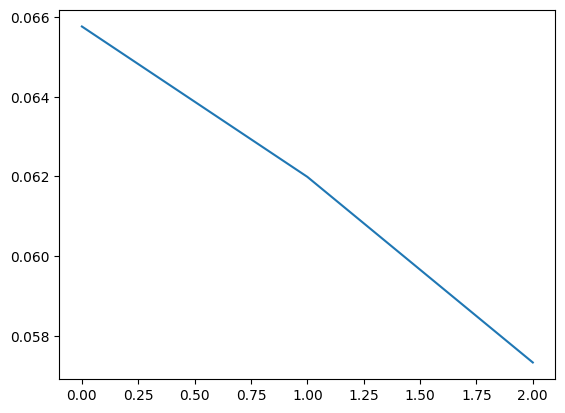

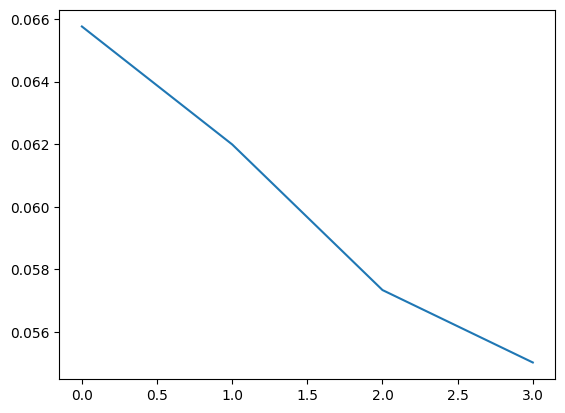

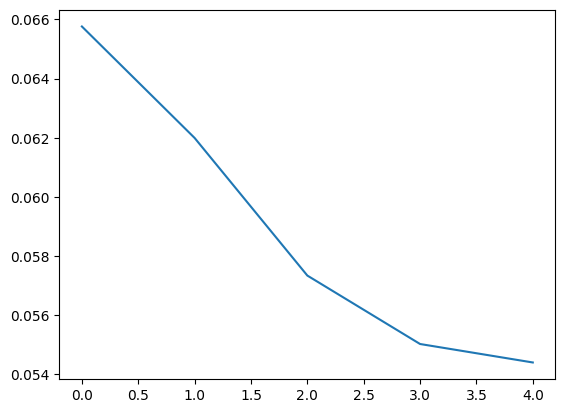

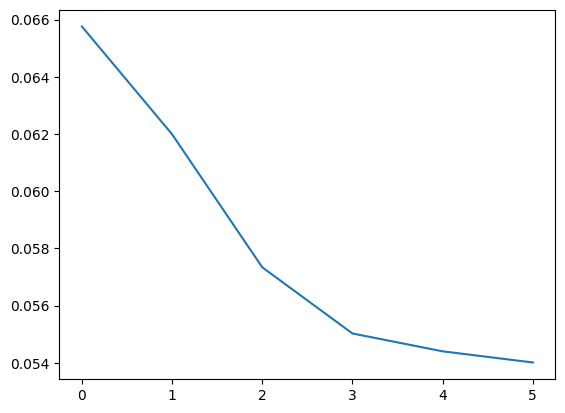

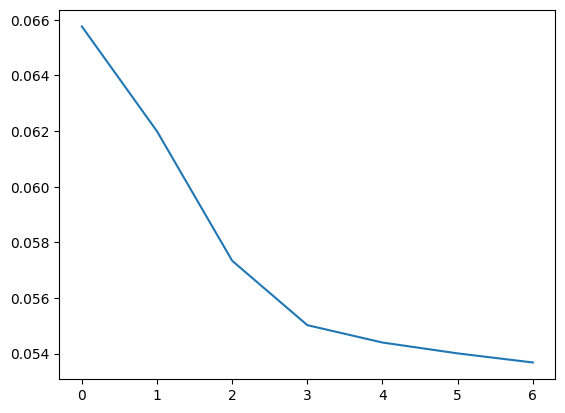

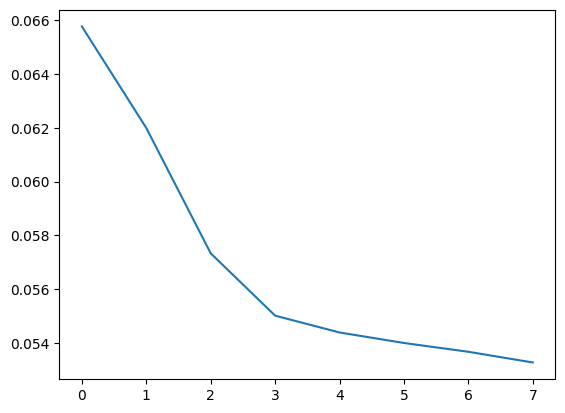

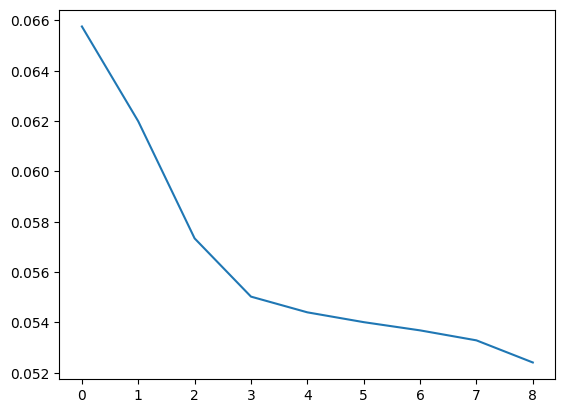

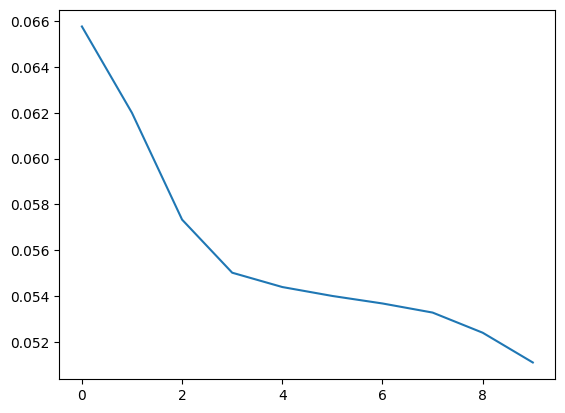

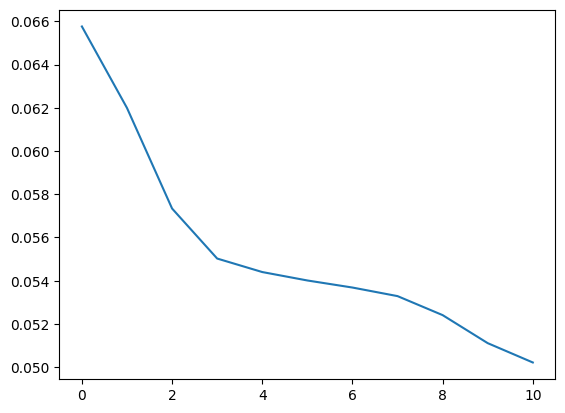

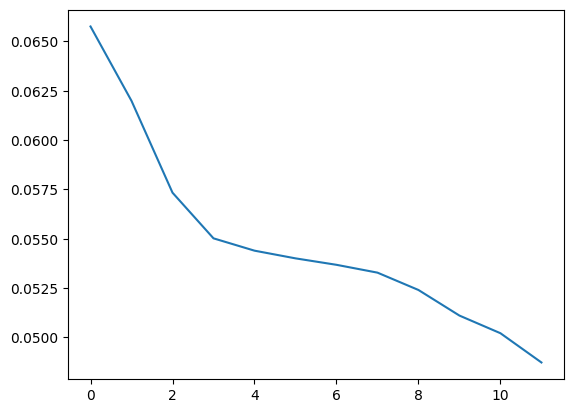

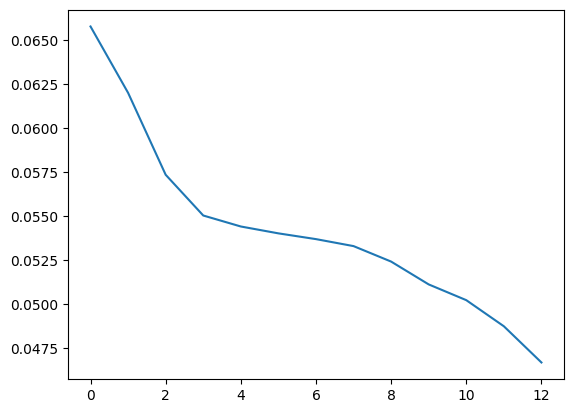

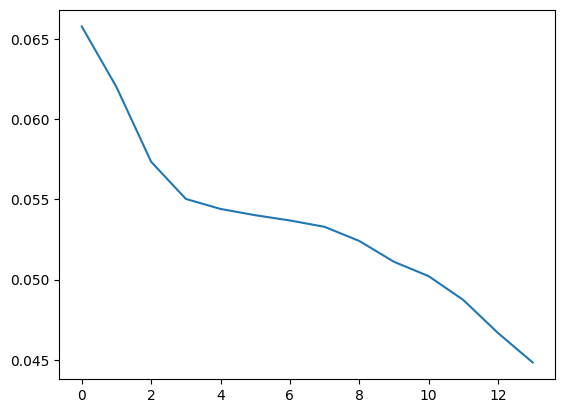

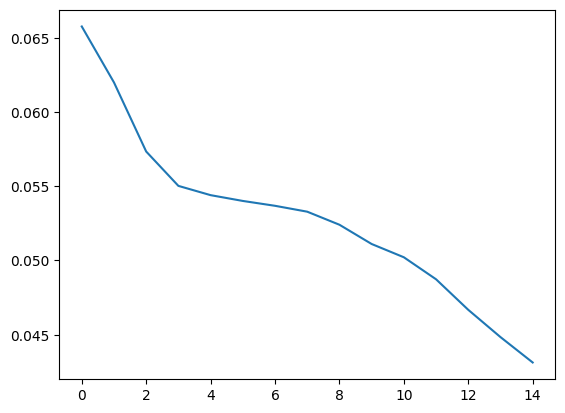

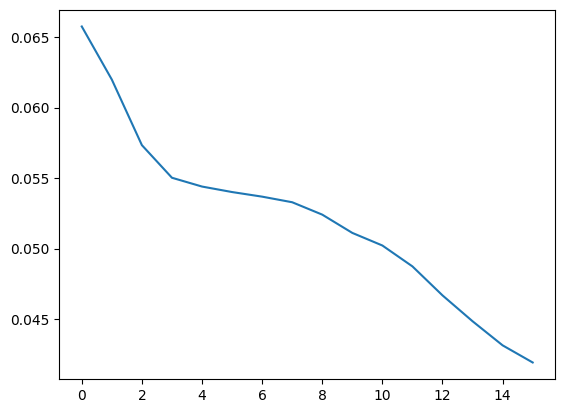

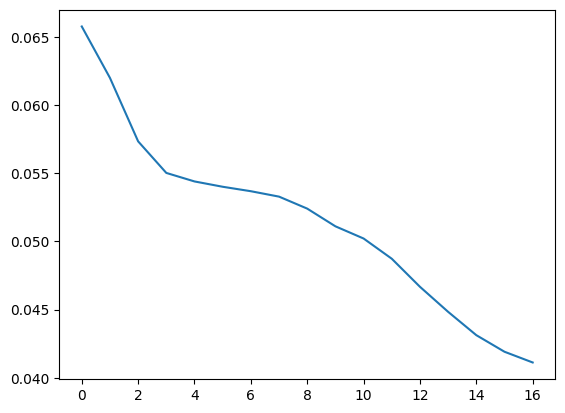

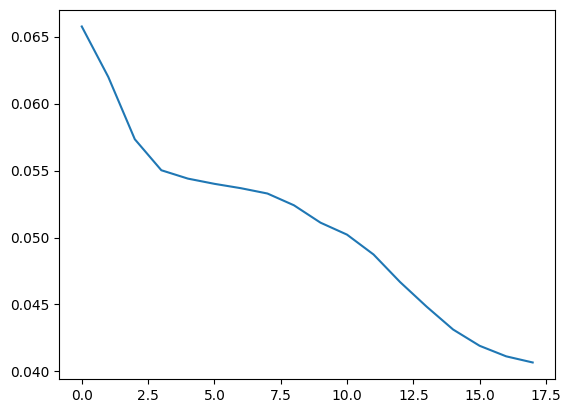

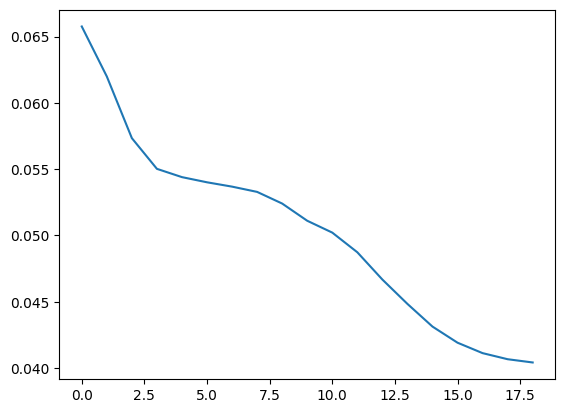

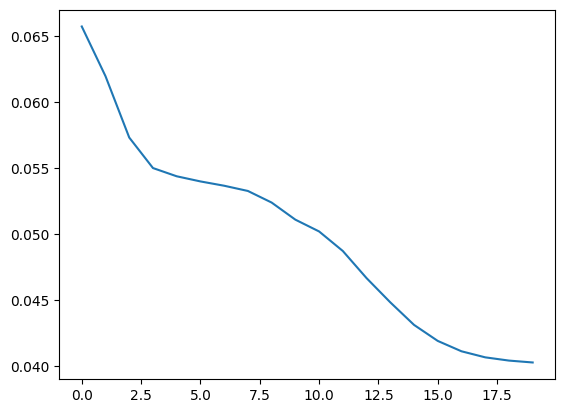

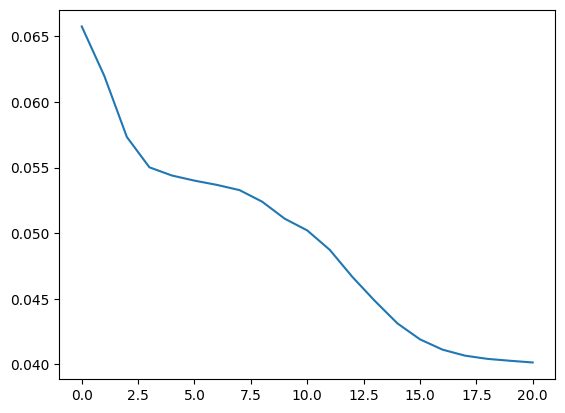

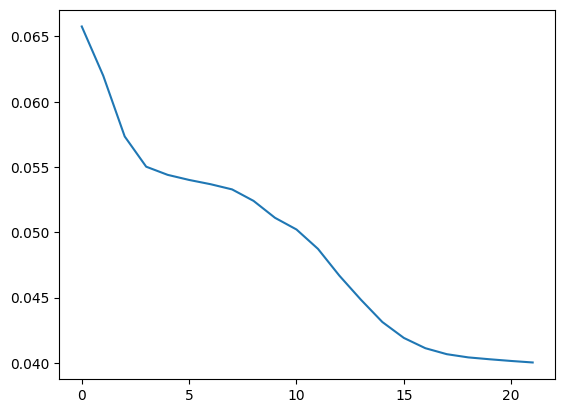

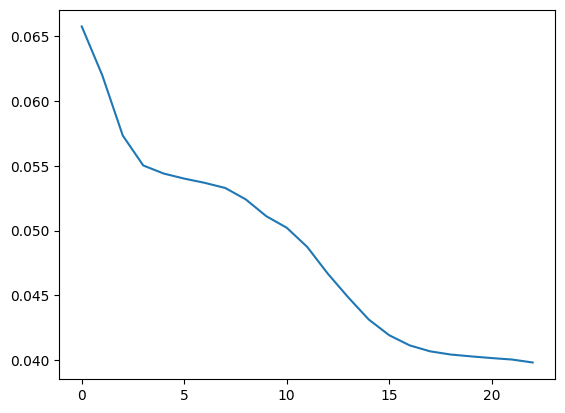

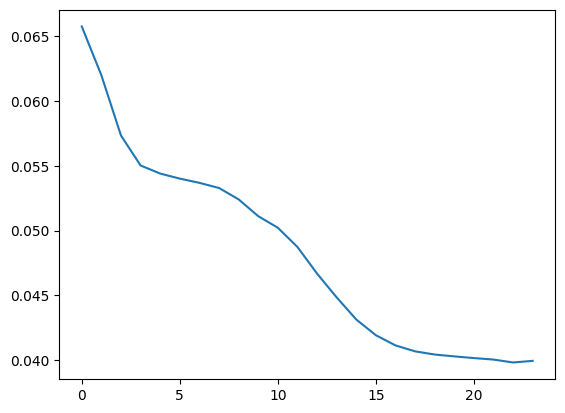

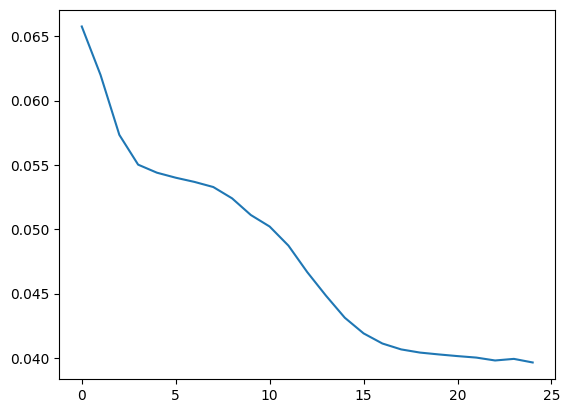

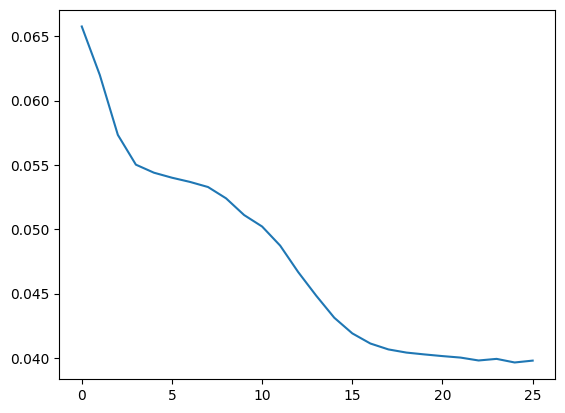

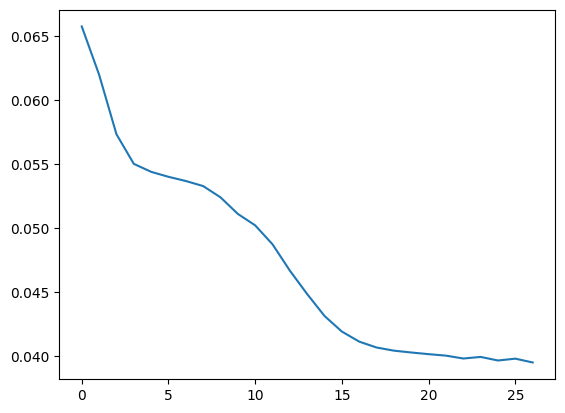

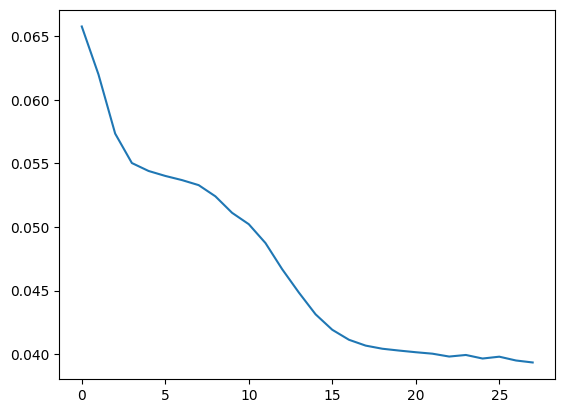

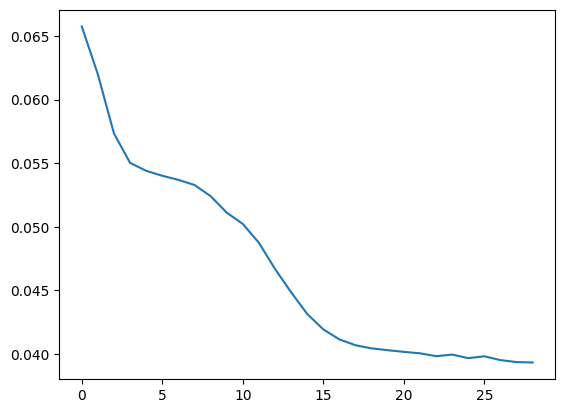

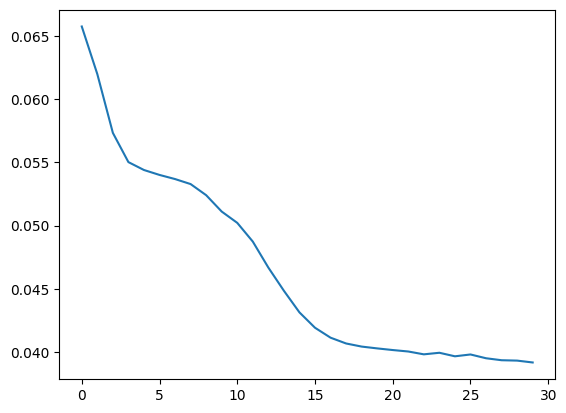

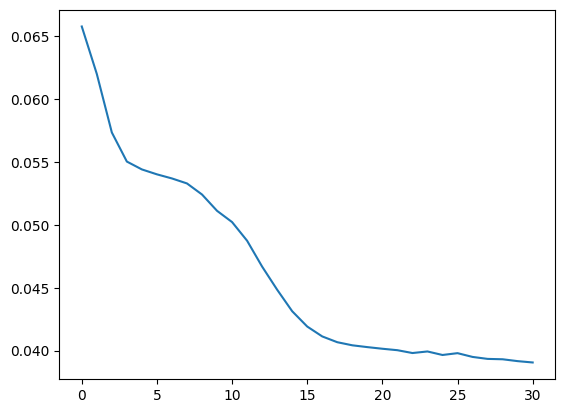

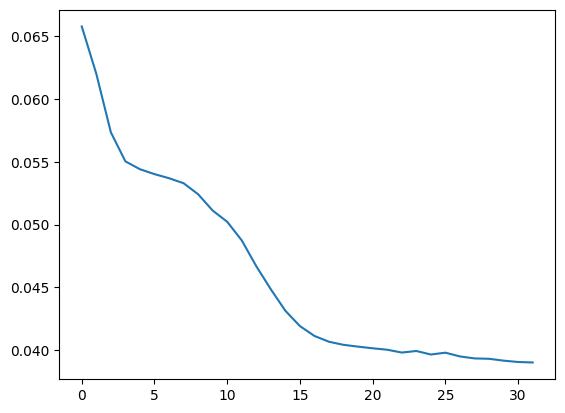

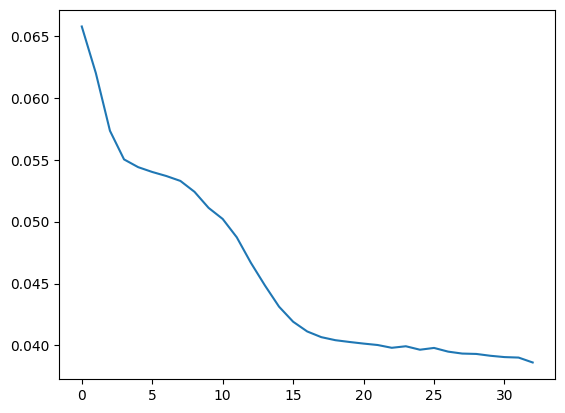

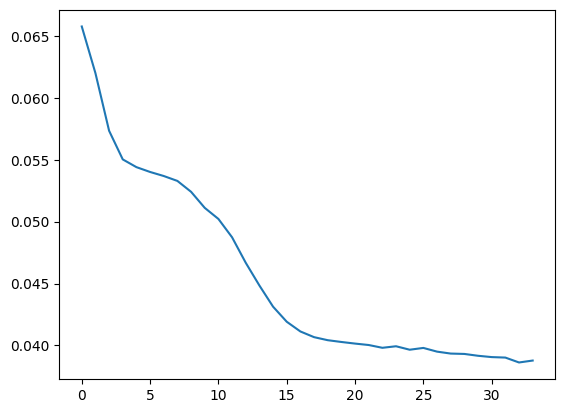

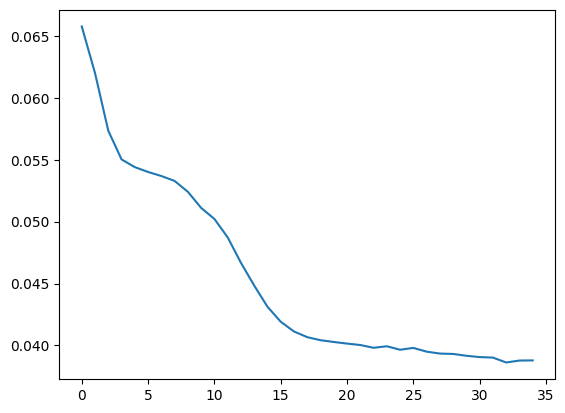

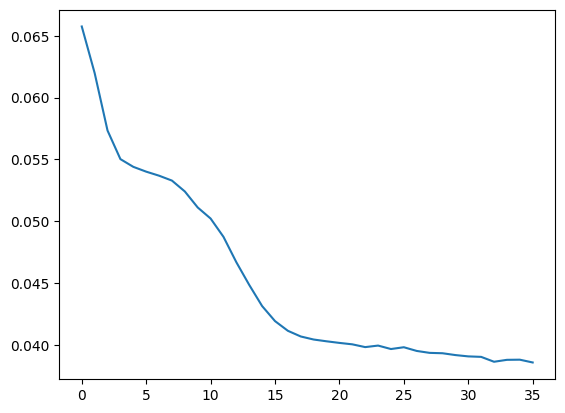

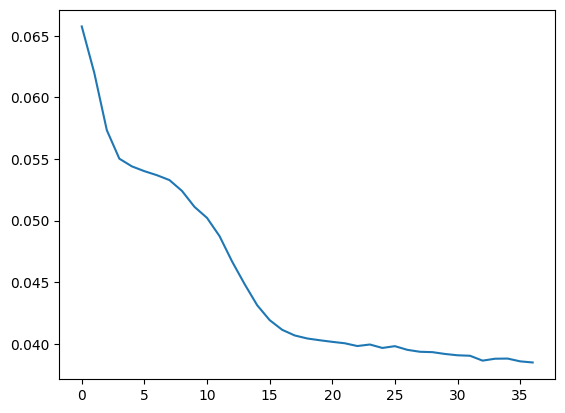

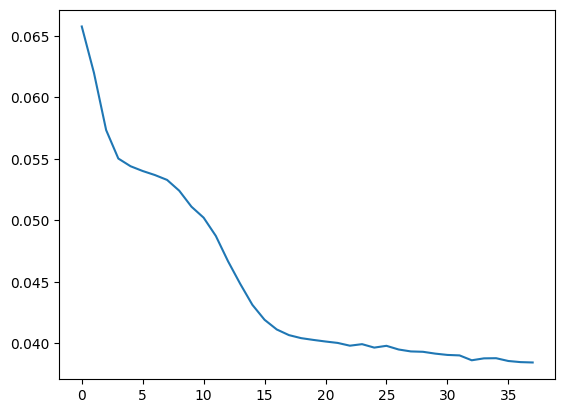

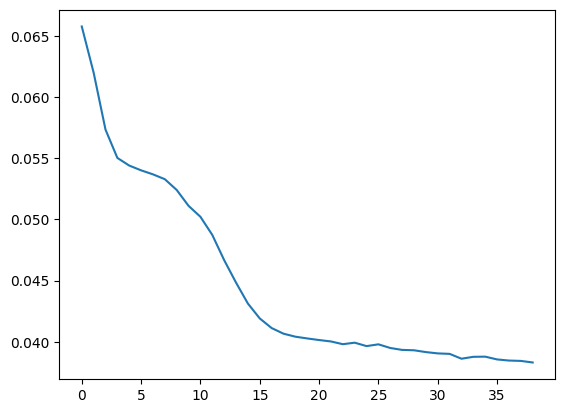

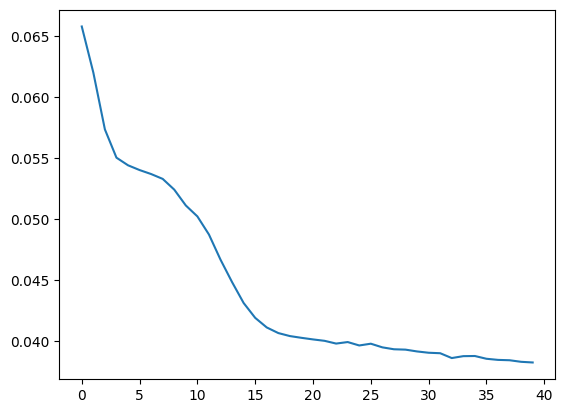

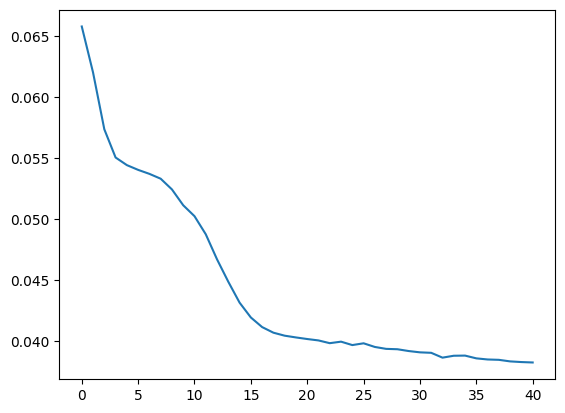

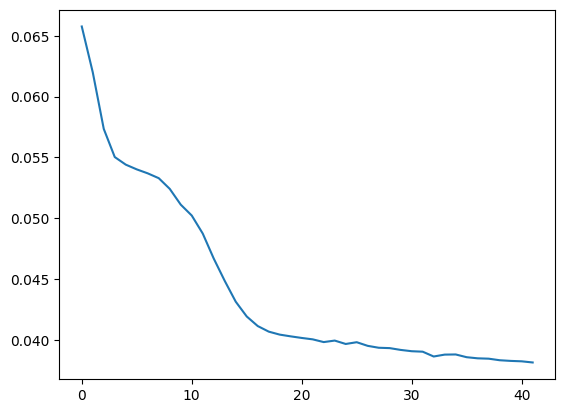

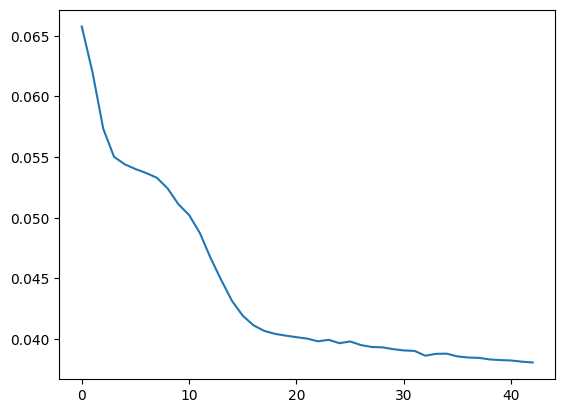

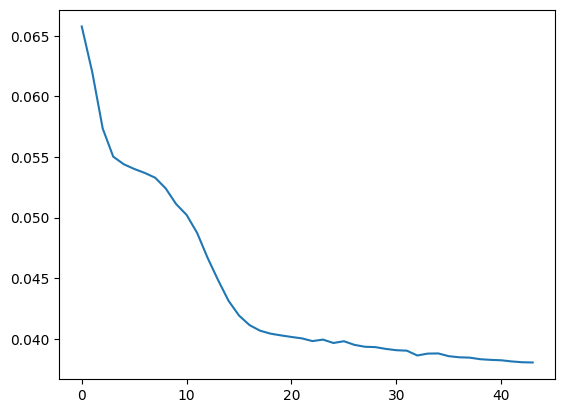

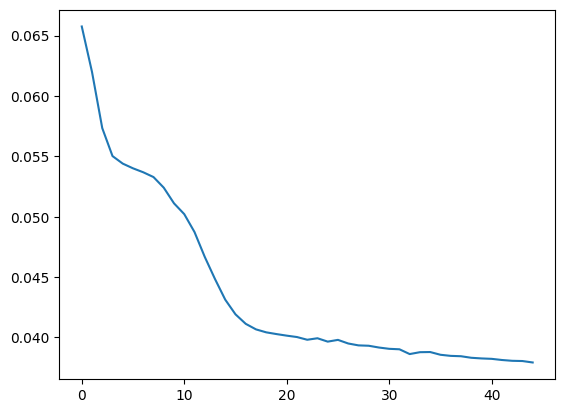

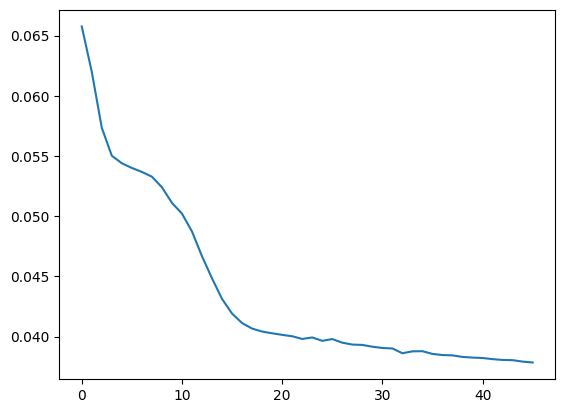

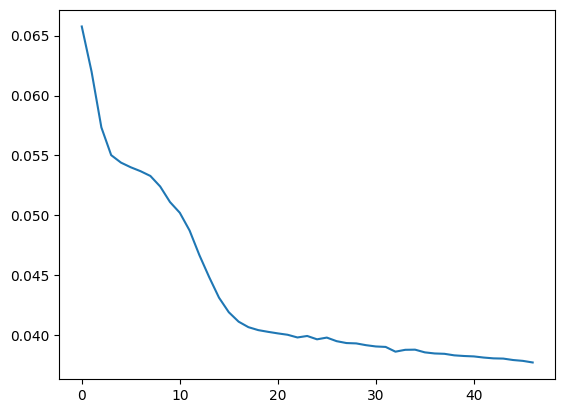

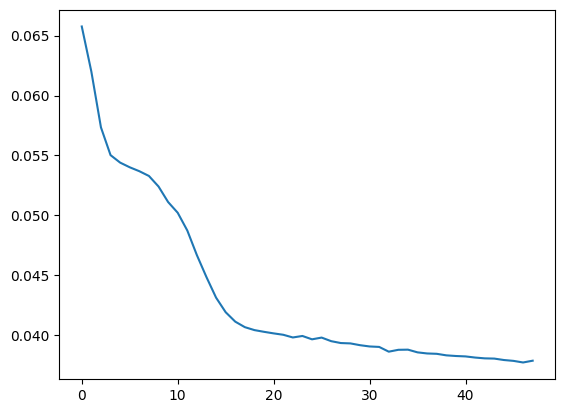

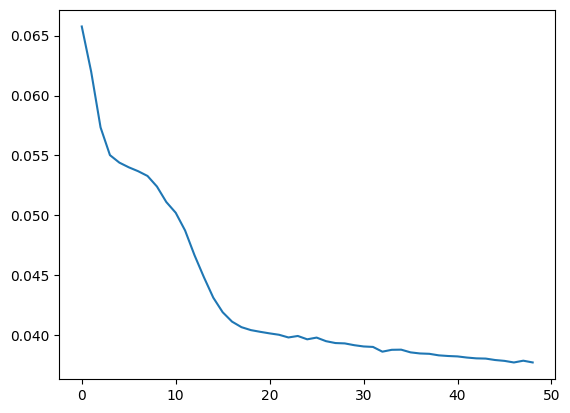

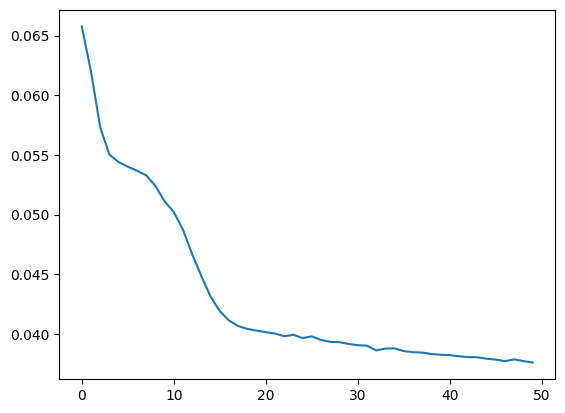

In [ ]:
epoch_losses_mse, epoch_losses_kld=cvae.train(x_train/255,y_t,epochs=50)

Text(0, 0.5, 'Loss')

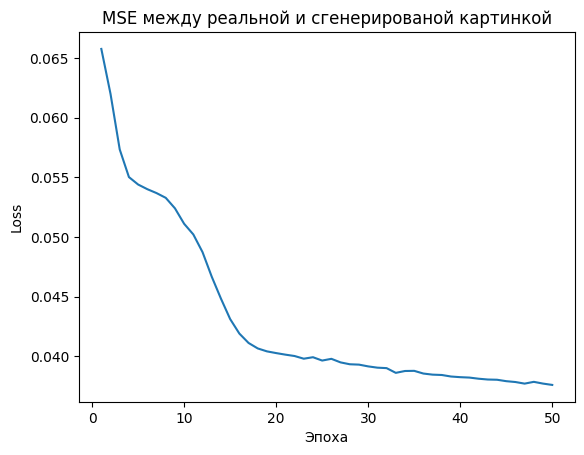

In [27]:
plt.plot([i for i in range(1,51)],epoch_losses_mse)
plt.title('MSE между реальной и сгенерированой картинкой')
plt.xlabel('Эпоха')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

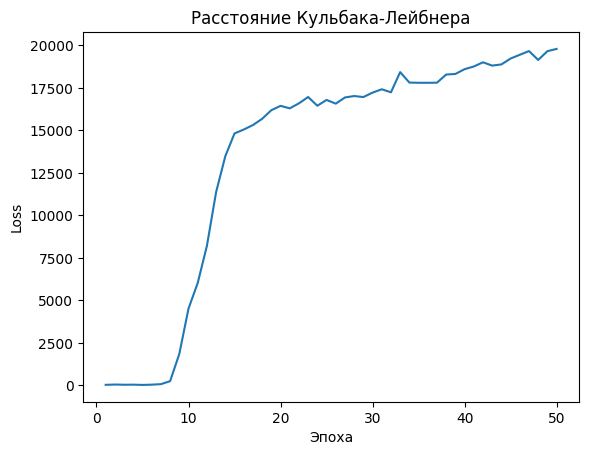

In [28]:
plt.plot([i for i in range(1,51)],epoch_losses_kld)
plt.title('Расстояние Кульбака-Лейбнера')
plt.xlabel('Эпоха')
plt.ylabel('Loss')

# Тестирование модели

In [9]:
digit_size = 28
def plot_digits(*args, invert_colors=False):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    figure = np.zeros((digit_size * len(args), digit_size * n))

    for i in range(n):
        for j in range(len(args)):
            figure[j * digit_size: (j + 1) * digit_size,
                   i * digit_size: (i + 1) * digit_size] = args[j][i].squeeze()

    if invert_colors:
        figure = 1-figure

    plt.figure(figsize=(2*n, 2*len(args)))
    plt.imshow(figure, cmap='Greys_r')
    plt.grid(False)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

Сравнение с конкретными цифрами:

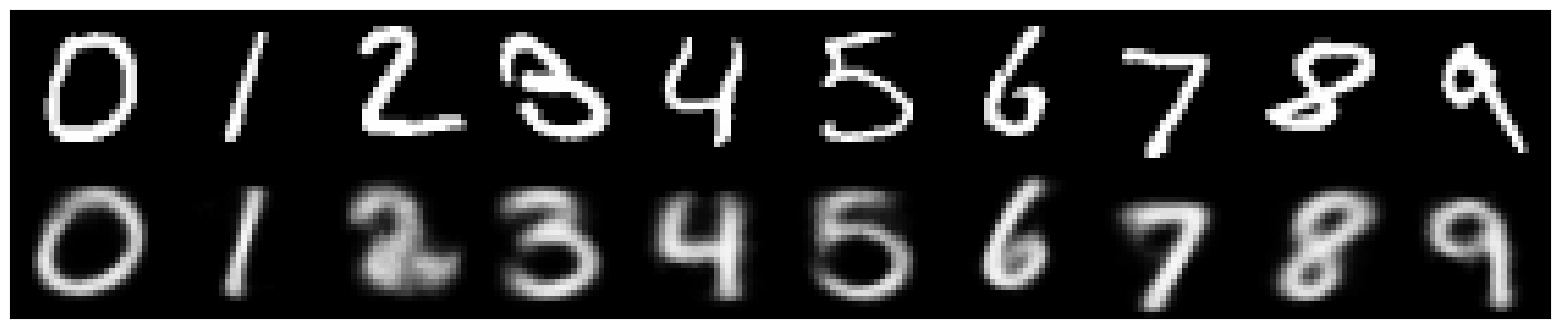

In [30]:
plot_digits(x_test[[10,2,1,18,4,15,50,0,61,7]],cvae.predict(x_test[[10,2,1,18,4,15,50,0,61,7]]/255, ohe.transform(y_test[[10,2,1,18,4,15,50,0,61,7]].reshape(-1,1))).reshape(10,28,28)*255)

Генерация цифр:

In [25]:
y_gen=cvae.generate_digits(10, hidden_size, ohe)

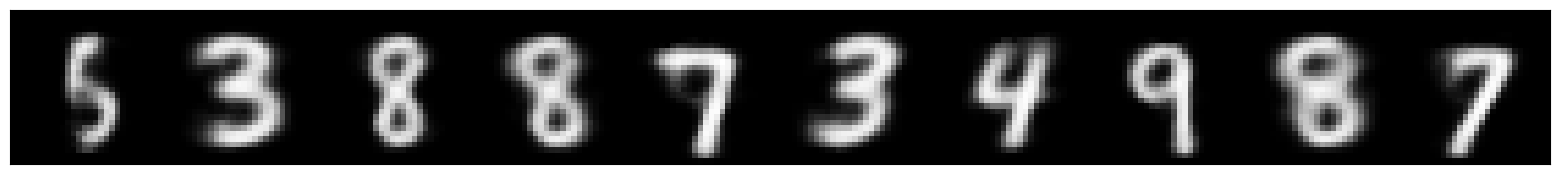

In [26]:
plot_digits(np.clip(y_gen.reshape(10,28,28)*255, 0, 255))